In [1]:
from imports import *
%matplotlib inline

((1049, 4196), (1024, 4096))

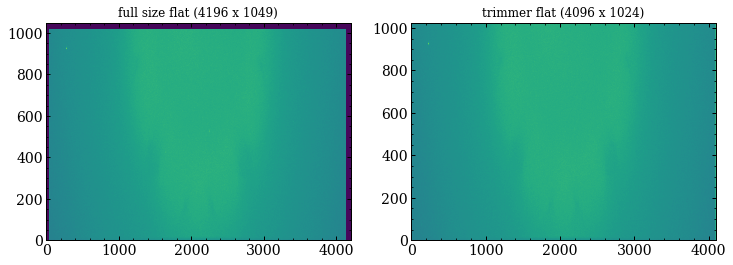

In [2]:
# get one flat 
flat_img1 = fits.open('/Users/ryancloutier/Research/Tierras/incoming/20220331/20220331.0459.FLAT001.fit')[1].data.astype(float)

# define overscan and smear regions so they won't contribute to the median operation
x,y = np.meshgrid(np.arange(1024), np.arange(50,4196-50))
flat_img1_trimmed = flat_img1[x,y].T

vmin, vmax = 0, 4e4
plt.figure(figsize=(12,4))
plt.subplot(121), plt.pcolormesh(flat_img1, vmin=vmin, vmax=vmax), plt.title('full size flat (%i x %i)'%flat_img1.shape[::-1])
plt.subplot(122), plt.pcolormesh(flat_img1_trimmed, vmin=vmin, vmax=vmax), plt.title('trimmed flat (%i x %i)'%flat_img1_trimmed.shape[::-1])
flat_img1.shape, flat_img1_trimmed.shape

(1024, 4096)

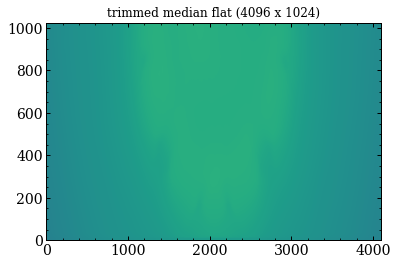

In [3]:
# compute median of the trimmed flat image (i.e. no NaNs)
medimg_trimmed = median_filter(flat_img1_trimmed, size=49)
plt.pcolormesh(medimg_trimmed, vmin=vmin, vmax=vmax), plt.title('trimmed median flat (%i x %i)'%medimg_trimmed.shape[::-1])
medimg_trimmed.shape

(1049, 4196)

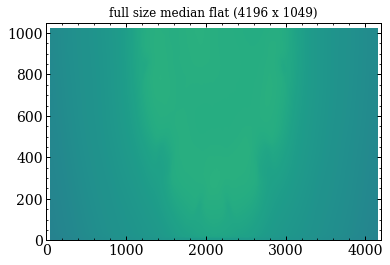

In [4]:
# add NaNs to the edges of the median image so that it's the same size as the original flat
medimg = np.zeros_like(flat_img1) + np.nan
medimg[x,y] = medimg_trimmed.T
plt.pcolormesh(medimg, vmin=vmin, vmax=vmax), plt.title('full size median flat (%i x %i)'%medimg.shape[::-1])
medimg.shape